# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

Here we load the `MASS` package, which is a very large collection of data sets and functions. 
We also load the `ISLR2` package, which includes the data sets associated with this book.

In [1]:
library(MASS)
library(ISLR2)


Attaching package: ‘ISLR2’


The following object is masked from ‘package:MASS’:

    Boston




## 3.6.2 Simple Linear Regression

The `ISLR2` library contains the `Boston` data set, which records `medv` (median house value) for 506 census tracts in Boston. 
We will seek to predict `medv` using 12 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).

In [2]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


We will start by using the `lm()` function to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. 
The basic `lm()` syntax is `lm(y ∼ x, data)`, where `y` is the response, `x` is the predictor, and `data` is the data set in which these two variables are kept.

In [3]:
lm.fit <- lm(medv ~ lstat, data = Boston)

In [4]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [5]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [8]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Although we can extract these quantities by name—e.g. `lm.fit$coefficients`—it is safer to use the extractor functions like `coef()` to access them.

In [13]:
print(coef(lm.fit))

(Intercept)       lstat 
 34.5538409  -0.9500494 


In order to obtain a confidence interval for the coefficient estimates, we can use the `confint()` command.

In [10]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The `predict()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

In [18]:
predict(
    lm.fit,
    data.frame(lstat = c(5, 10, 15)),
    interval = "confidence",
)

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [19]:
predict(
    lm.fit,
    data.frame(lstat = c(5, 10, 15)),
    interval = "prediction",
)

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


For instance, the 95% confidence interval associated with a `lstat` value of 10 is (24.47, 25.63), and the 95% prediction interval is (12.828, 37.28). 
As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for `medv` when `lstat` equals 10), but the latter are substantially wider.

We will now plot `medv` and `lstat` along with the least squares regression line using the `plot()` and `abline()` functions.

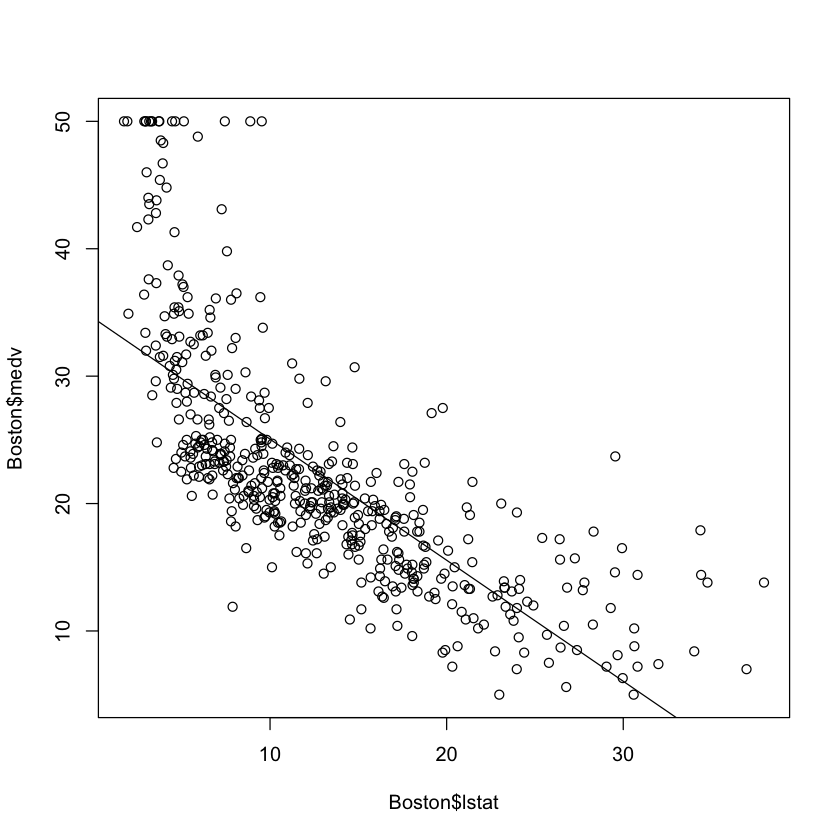

In [22]:
plot(Boston$lstat, Boston$medv)
abline(lm.fit)

There is some evidence for non-linearity in the relationship between `lstat` and `medv`. 
We will explore this issue later in this lab.

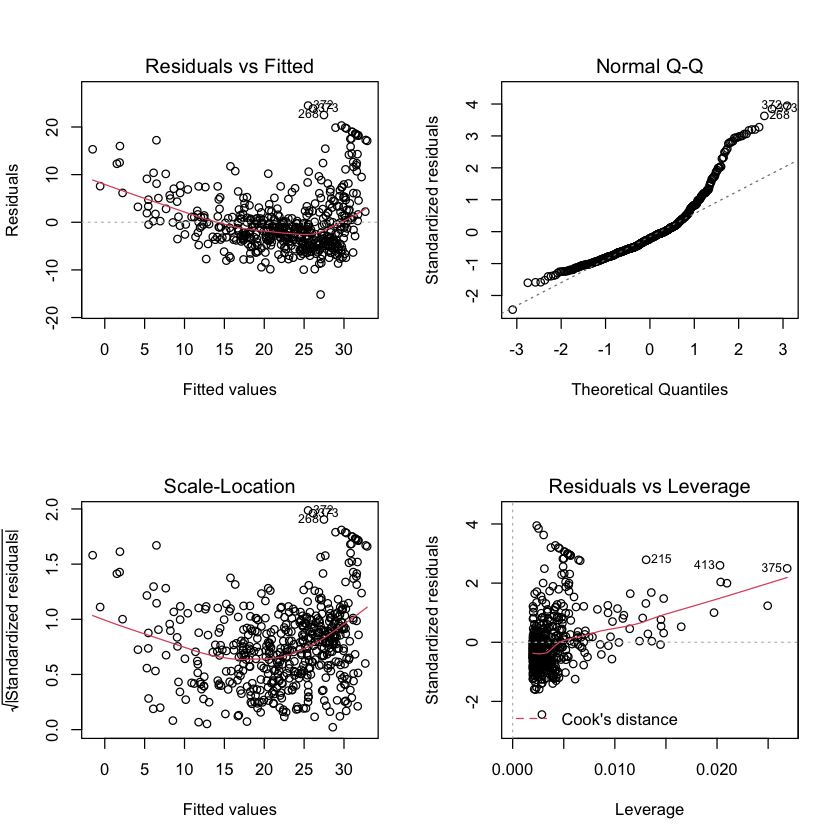

In [23]:
par(mfrow = c(2, 2))
plot(lm.fit)

Alternatively, we can compute the residuals from a linear regression fit using the `residuals()` function. 
The function `rstudent()` will return the studentized residuals, and we can use this function to plot the residuals against the fitted values.

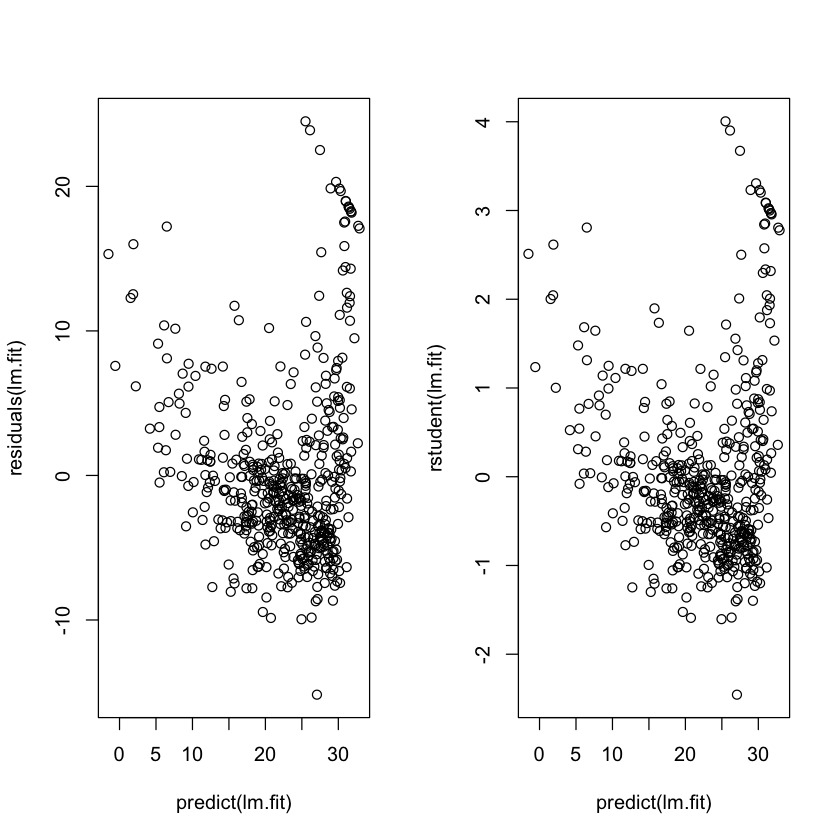

In [26]:
par(mfrow = c(1, 2))
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

On the basis of the residual plots, there is some evidence of non-linearity. 
Leverage statistics can be computed for any number of predictors using the `hatvalues()` function.

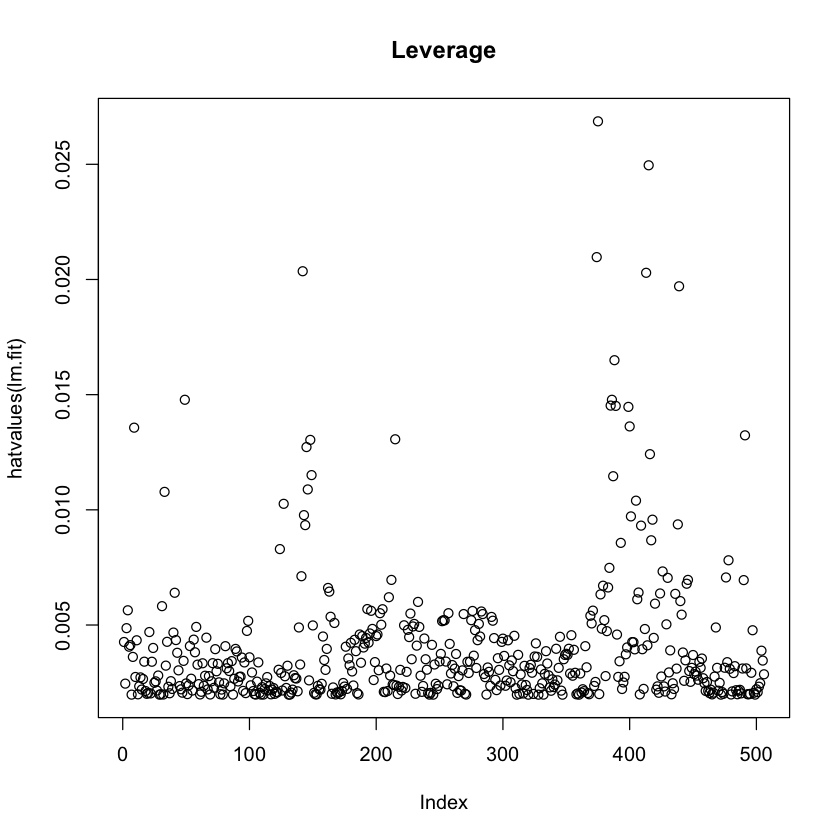

In [28]:
plot(hatvalues(lm.fit), main = "Leverage")

In [29]:
which.max(hatvalues(lm.fit))

375 
375

The `which.max()` function identifies the index of the largest element of a vector. 
In this case, **it tells us which observation has the largest leverage statistic**.

## 3.6.3 Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the `lm()` function. 
The syntax `lm(y ∼ x1 + x2 + x3)` is used to fit a model with three predictors, `x1`, `x2`, and `x3`. 
The `summary()` function now outputs the regression coefficients for all the predictors.

In [30]:
lm.fit <- lm(medv ~ lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


The Boston data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. 
Instead, we can use the following short-hand:

In [33]:
lm.fit <- lm(medv ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1304  -2.7673  -0.5814   1.9414  26.2526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.617270   4.936039   8.431 3.79e-16 ***
crim         -0.121389   0.033000  -3.678 0.000261 ***
zn            0.046963   0.013879   3.384 0.000772 ***
indus         0.013468   0.062145   0.217 0.828520    
chas          2.839993   0.870007   3.264 0.001173 ** 
nox         -18.758022   3.851355  -4.870 1.50e-06 ***
rm            3.658119   0.420246   8.705  < 2e-16 ***
age           0.003611   0.013329   0.271 0.786595    
dis          -1.490754   0.201623  -7.394 6.17e-13 ***
rad           0.289405   0.066908   4.325 1.84e-05 ***
tax          -0.012682   0.003801  -3.337 0.000912 ***
ptratio      -0.937533   0.132206  -7.091 4.63e-12 ***
lstat        -0.552019   0.050659 -10.897  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can access the individual components of a summary object by name (type `?summary.lm` to see what is available). 
Hence `summary(lm.fit)$r.sq` gives us the $R^2$, and `summary(lm.fit)$sigma` gives us the RSE. 
The `vif()` function, part of the `car` package, can be used to compute variance inflation factors. 
Most VIF's are low to moderate for this data. 
The `car` package is not part of the base `R` installation so it must be downloaded the first time you use it via the `install.packages()` function in `R`.

In [37]:
library(car)
print(vif(lm.fit))  # data.frame(vif(lm.fit))

    crim       zn    indus     chas      nox       rm      age      dis 
1.767486 2.298459 3.987181 1.071168 4.369093 1.912532 3.088232 3.954037 
     rad      tax  ptratio    lstat 
7.445301 9.002158 1.797060 2.870777 


What if we would like to perform a regression using all of the variables but one? 
For example, in the above regression output, `age` has a high $p$-value.
So we may wish to run a regression excluding this predictor. 
The following syntax results in a regression using all predictors except `age`.

In [38]:
lm.fit1 <- lm(medv ~ . - age, data = Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1851  -2.7330  -0.6116   1.8555  26.3838 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.525128   4.919684   8.441 3.52e-16 ***
crim         -0.121426   0.032969  -3.683 0.000256 ***
zn            0.046512   0.013766   3.379 0.000785 ***
indus         0.013451   0.062086   0.217 0.828577    
chas          2.852773   0.867912   3.287 0.001085 ** 
nox         -18.485070   3.713714  -4.978 8.91e-07 ***
rm            3.681070   0.411230   8.951  < 2e-16 ***
dis          -1.506777   0.192570  -7.825 3.12e-14 ***
rad           0.287940   0.066627   4.322 1.87e-05 ***
tax          -0.012653   0.003796  -3.333 0.000923 ***
ptratio      -0.934649   0.131653  -7.099 4.39e-12 ***
lstat        -0.547409   0.047669 -11.483  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.794 on 494 degrees o

Alternatively, the `update()` function can be used.

In [39]:
lm.fit1 <- update(lm.fit, ~ . - age)
summary(lm.fit1)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1851  -2.7330  -0.6116   1.8555  26.3838 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.525128   4.919684   8.441 3.52e-16 ***
crim         -0.121426   0.032969  -3.683 0.000256 ***
zn            0.046512   0.013766   3.379 0.000785 ***
indus         0.013451   0.062086   0.217 0.828577    
chas          2.852773   0.867912   3.287 0.001085 ** 
nox         -18.485070   3.713714  -4.978 8.91e-07 ***
rm            3.681070   0.411230   8.951  < 2e-16 ***
dis          -1.506777   0.192570  -7.825 3.12e-14 ***
rad           0.287940   0.066627   4.322 1.87e-05 ***
tax          -0.012653   0.003796  -3.333 0.000923 ***
ptratio      -0.934649   0.131653  -7.099 4.39e-12 ***
lstat        -0.547409   0.047669 -11.483  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

## 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the `lm()` function. 
The syntax `lstat:black` tells `R` to include an interaction term between `lstat` and `black`. 
The syntax `lstat * age` simultaneously includes `lstat`, `age`, and the interaction term `lstat x age` as predictors; it is a short-hand for `lstat + age + lstat:age`.

In [40]:
summary(lm(medv ~ lstat * age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## 3.6.5 Non-linear Transformations of the Predictors

The `lm()` function can also accommodate non-linear transformations of the predictors. 
For instance, given a predictor $X$, we can create a predictor $X^2$ using `I(X^2)`. 
The function `I()` is needed since the `^` has a special meaning in a formula object; wrapping as we do allows the standard usage in `R`, `I()` which is to raise `X` to the power `2`. 
We now perform a regression of `medv` onto `lstat` and `lstat^2`.

In [42]:
lm.fit2 <- lm(medv ~ lstat + I(lstat^2), data = Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero $p$-value associated with the quadratic term suggests that it leads to an improved model. 
We use the `anova()` function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [44]:
lm.fit <- lm(medv ~ lstat, data = Boston)

In [46]:
print(anova(lm.fit, lm.fit2))

Analysis of Variance Table

Model 1: medv ~ lstat
Model 2: medv ~ lstat + I(lstat^2)
  Res.Df   RSS Df Sum of Sq     F    Pr(>F)    
1    504 19472                                 
2    503 15347  1    4125.1 135.2 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [47]:
anova(lm.fit, lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, `lstat`, while Model2 corresponds to the larger quadratic model that has two predictors, `lstat` and `lstat^2`. 
The `anova()` function performs a hypothesis test comparing the two models. 
The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. 
Here the F-statistic is 135 and the associated $p$-value is virtually zero. 
This provides very clear evidence that the model containing the predictors `lstat` and `lstat^2` is far superior to the model that only contains the predictor `lstat`. 
This is not surprising, since earlier we saw evidence for non-linearity in the relationship between `medv` and `lstat`.

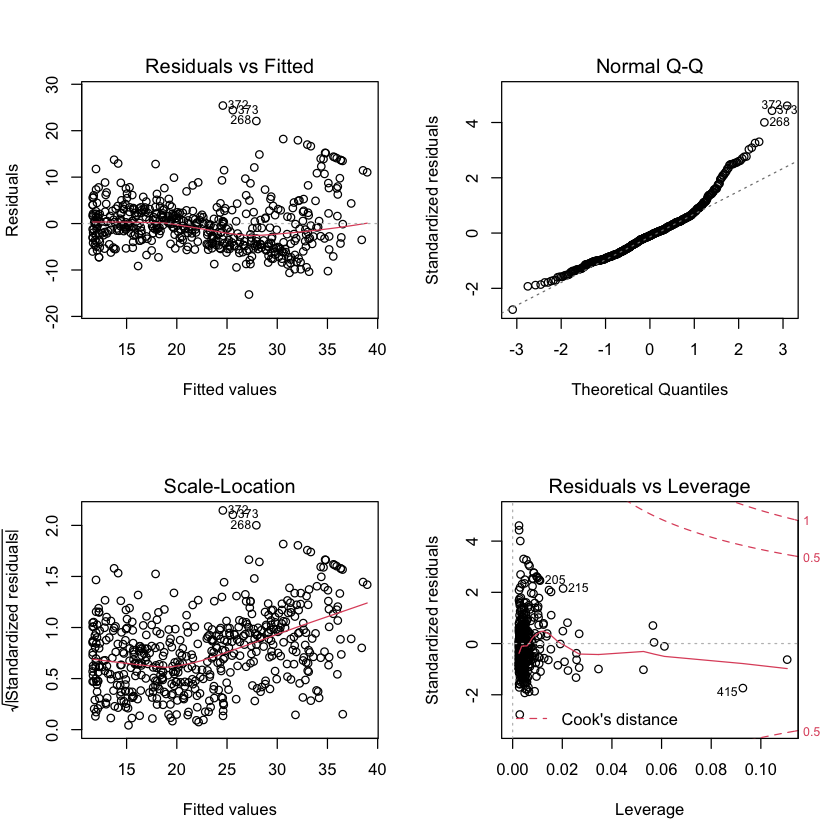

In [48]:
par(mfrow = c(2, 2))
plot(lm.fit2)

We see that when the `lstat^2` term is included in the model, there is little discernible pattern in the residuals.

In order to create a cubic fit, we can include a predictor of the form `I(X^3)`. 
However, this approach can start to get cumbersome for higher-order polynomials. 
A better approach involves using the `poly()` function to create the polynomial within `lm()`. 
For example, the following command produces a fifth-order polynomial fit:

In [51]:
lm.fit5 <- lm(medv ~ poly(lstat, 5), data = Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! 
However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant $p$-values in a regression fit.

By default, the `poly()` **function orthogonalizes the predictors: this means that the features output by this function are not simply a sequence of powers of the argument**. However, a linear model applied to the output of the `poly()` function will have the same fitted values as a linear model applied to the raw polynomials (although the coefficient estimates, standard errors, and $p$-values will differ). 
In order to obtain the raw polynomials from the `poly()` function, the argument `raw = TRUE` must be used.

Of course, we are in no way restricted to using polynomial transformations of the predictors. 
Here we try a `log` transformation.

In [52]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


## 3.6.6 Qualitative Predictors

We will now examine the `Carseats` data, which is part of the `ISLR2` library. 
We will attempt to predict `Sales` (child car seat sales) in 400 locations based on a number of predictors.

In [53]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


The `Carseats` data includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. 
The predictor `Shelveloc` takes on three possible values: `Bad`, `Medium`, and `Good`. 
Given a qualitative variable such as `Shelveloc`, `R` generates dummy variables automatically. 
Below we fit a multiple regression model that includes some interaction terms.

In [54]:
lm.fit <- lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

The `contrasts()` function returns the coding that `R` uses for the dummy variables.

In [56]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


`R` has created a `ShelveLocGood` dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. 
It has also created a `ShelveLocMedium` dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. 
A bad shelving location corresponds to a zero for each of the two dummy variables. 
**The fact that the coefficient for `ShelveLocGood` in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location)**. 
**And `ShelveLocMedium` has a smaller positive coefficient, indicating that a medium shelving location is associated with higher sales than a bad shelving location but lower sales than a good shelving location**.

## 3.6.7 Writing Functions


In [57]:
LoadLibraries <- function() {
    library(ISLR2)
    library(MASS)
    print("The libraries have been loaded.")
}

In [58]:
LoadLibraries()

[1] "The libraries have been loaded."
